In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('../application_train.csv')

In [3]:
train_df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.shape


(307511, 122)

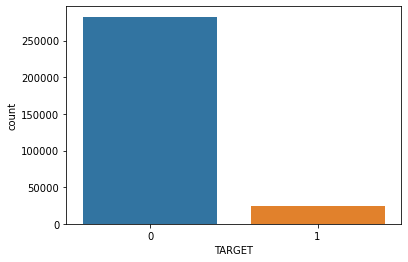

In [5]:
sns.countplot(x='TARGET',data=train_df);

In [6]:
train_df.isna().sum() != 0

SK_ID_CURR                    False
TARGET                        False
NAME_CONTRACT_TYPE            False
CODE_GENDER                   False
FLAG_OWN_CAR                  False
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY      True
AMT_REQ_CREDIT_BUREAU_WEEK     True
AMT_REQ_CREDIT_BUREAU_MON      True
AMT_REQ_CREDIT_BUREAU_QRT      True
AMT_REQ_CREDIT_BUREAU_YEAR     True
Length: 122, dtype: bool

In [7]:
# no of columns
train_df.columns.shape

(122,)

In [8]:
# no of columns with nan values
train_df.columns[train_df.isna().sum() != 0].shape

(67,)

In [9]:
cols_with_nan = train_df.columns[train_df.isna().sum() != 0]

In [10]:
(train_df.isna().sum(axis=1) != 0).shape

(307511,)

In [11]:
train_df.shape

(307511, 122)

In [12]:
cols_with_50_perc_nan = {}
for col,no_of_nans in train_df[train_df.columns[train_df.isna().sum() != 0]].isna().sum().sort_values(ascending=False).iteritems():
    if (no_of_nans/train_df.shape[0]*100) > 50:
        cols_with_50_perc_nan[col] = no_of_nans/train_df.shape[0]*100

In [13]:
len(cols_with_50_perc_nan)

41

In [14]:
col_with_50_float_nan = [col for col,value in (train_df[cols_with_50_perc_nan].dtypes == 'float64').iteritems() if value]

In [15]:
len(col_with_50_float_nan)

38

In [16]:
train_df.drop(col_with_50_float_nan,axis=1,inplace=True)

In [17]:
train_df.shape

(307511, 84)

In [18]:
object_cols_name_with_nan = train_df.columns[train_df.dtypes == 'object'][train_df[train_df.columns[train_df.dtypes == 'object']].isna().sum() != 0]

In [19]:
non_numerical_cols_to_drop = ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']

In [20]:
train_df.drop(non_numerical_cols_to_drop,axis=1,inplace=True)

In [21]:
train_df.shape

(307511, 81)

In [22]:
object_cols_name = train_df.columns[train_df.dtypes=='object']
object_cols_name.shape

(13,)

In [23]:
train_df[object_cols_name.values].isna().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
EMERGENCYSTATE_MODE           145755
dtype: int64

In [24]:
train_df['NAME_TYPE_SUITE'] = train_df['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [25]:
total = train_df['OCCUPATION_TYPE'].value_counts().sum()
print(total)
population = []
weights = []
for i,j in train_df['OCCUPATION_TYPE'].value_counts().iteritems():
    population.append(i)
    weights.append(j/total)
print(population)
print(weights)

211120
['Laborers', 'Sales staff', 'Core staff', 'Managers', 'Drivers', 'High skill tech staff', 'Accountants', 'Medicine staff', 'Security staff', 'Cooking staff', 'Cleaning staff', 'Private service staff', 'Low-skill Laborers', 'Waiters/barmen staff', 'Secretaries', 'Realty agents', 'HR staff', 'IT staff']
[0.2613963622584312, 0.15205570291777187, 0.13058923834785904, 0.10122679045092839, 0.08811576354679802, 0.053902993558165975, 0.046480674497915875, 0.04043671845395983, 0.031834975369458125, 0.028164077302008338, 0.02203959833270178, 0.012561576354679803, 0.009913793103448277, 0.006384994316028798, 0.006181318681318681, 0.00355721864342554, 0.0026667298219022356, 0.002491474043198181]


In [26]:
import random
occupation_filling_values = random.choices(population=population,weights=weights,k=96391)

In [27]:
def get_random_occupation():
    return np.random.choice(occupation_filling_values)

In [28]:
train_df['OCCUPATION_TYPE'] = train_df['OCCUPATION_TYPE'].fillna(get_random_occupation())

In [29]:
total = train_df['EMERGENCYSTATE_MODE'].value_counts().sum()
print(total)
population = []
weights = []
for i,j in train_df['EMERGENCYSTATE_MODE'].value_counts().iteritems():
    population.append(i)
    weights.append(j/total)
print(population)
print(weights)

161756
['No', 'Yes']
[0.98560795271891, 0.014392047281090036]


In [30]:
emergency_filling_values = random.choices(population=population,weights=weights,k=145755)

In [31]:
def get_random_emergency():
    return np.random.choice(emergency_filling_values)

In [32]:
train_df['EMERGENCYSTATE_MODE'] = train_df['EMERGENCYSTATE_MODE'].fillna(get_random_emergency())

In [33]:
train_df[object_cols_name.values].isna().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
dtype: int64

In [34]:

float_nan_cols = train_df.columns[train_df.dtypes == 'float64'][train_df[train_df.columns[train_df.dtypes == 'float64']].isna().sum() != 0]
float_nan_cols

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [35]:
float_cols_with_outliers = [col for col in float_nan_cols]

In [36]:
for col in float_cols_with_outliers:
    median = train_df[col].median()
    train_df[col] = train_df[col].fillna(median)

In [37]:
train_df[float_nan_cols.values].isna().sum()

AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
CNT_FAM_MEMBERS                 0
EXT_SOURCE_2                    0
EXT_SOURCE_3                    0
YEARS_BEGINEXPLUATATION_AVG     0
FLOORSMAX_AVG                   0
YEARS_BEGINEXPLUATATION_MODE    0
FLOORSMAX_MODE                  0
YEARS_BEGINEXPLUATATION_MEDI    0
FLOORSMAX_MEDI                  0
TOTALAREA_MODE                  0
OBS_30_CNT_SOCIAL_CIRCLE        0
DEF_30_CNT_SOCIAL_CIRCLE        0
OBS_60_CNT_SOCIAL_CIRCLE        0
DEF_60_CNT_SOCIAL_CIRCLE        0
DAYS_LAST_PHONE_CHANGE          0
AMT_REQ_CREDIT_BUREAU_HOUR      0
AMT_REQ_CREDIT_BUREAU_DAY       0
AMT_REQ_CREDIT_BUREAU_WEEK      0
AMT_REQ_CREDIT_BUREAU_MON       0
AMT_REQ_CREDIT_BUREAU_QRT       0
AMT_REQ_CREDIT_BUREAU_YEAR      0
dtype: int64

In [38]:
from sklearn.preprocessing import RobustScaler

In [39]:
scaler = RobustScaler()
scaler.fit(train_df[float_nan_cols])
train_df[float_nan_cols] = scaler.transform(train_df[float_nan_cols])

In [40]:
train_df = train_df.join(pd.get_dummies(train_df['NAME_CONTRACT_TYPE'],prefix='NAME_CONTRACT_TYPE'))
train_df.drop('NAME_CONTRACT_TYPE',axis=1,inplace=True)

In [41]:
CODE_GENDER_mapping = {
    "M": 1,
    "F": 0,
    "XNA": 0
}

train_df['CODE_GENDER'] = train_df['CODE_GENDER'].map(CODE_GENDER_mapping)

In [42]:
FLAG_OWN_REALTY_mapping = {
    'N':0,
    'Y':1
}
train_df['FLAG_OWN_REALTY'] = train_df['FLAG_OWN_REALTY'].map(FLAG_OWN_REALTY_mapping)

In [43]:
FLAG_OWN_CAR_mapping = {
    'N':0,
    'Y':1
}

train_df['FLAG_OWN_CAR'] = train_df['FLAG_OWN_CAR'].map(FLAG_OWN_CAR_mapping)

In [44]:
NAME_EDUCATION_TYPE_mapping = {
    'Academic degree':4,
    'Higher education':3, 
    'Incomplete higher':2, 
    'Lower secondary':0, 
    'Secondary / secondary special':1
}
train_df['NAME_EDUCATION_TYPE'] = train_df['NAME_EDUCATION_TYPE'].map(NAME_EDUCATION_TYPE_mapping)

In [45]:
EMERGENCYSTATE_MODE_mapping = {
    'No': 0,
    'Yes':1
}
train_df['EMERGENCYSTATE_MODE'] = train_df['EMERGENCYSTATE_MODE'].map(EMERGENCYSTATE_MODE_mapping)

In [46]:

cols_for_encoding = ['NAME_TYPE_SUITE',
                           'NAME_INCOME_TYPE',
                           'NAME_FAMILY_STATUS',
                           'NAME_HOUSING_TYPE',
                           'OCCUPATION_TYPE',
                           'WEEKDAY_APPR_PROCESS_START',
                           'ORGANIZATION_TYPE'
                          ]
for col in cols_for_encoding:
    mapped_value = train_df.groupby([col])['TARGET'].mean().to_dict()
    train_df[col] = train_df[col].map(mapped_value)

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
X = train_df.drop('TARGET' , axis =1)
y = train_df['TARGET']
under = RandomUnderSampler(sampling_strategy='majority')
X , y = under.fit_resample(X, y)

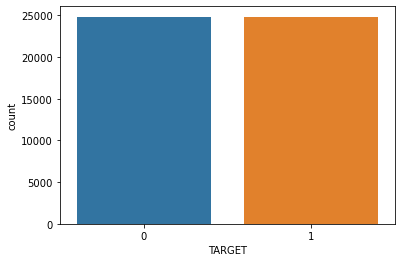

In [49]:
sns.countplot(x='TARGET',data=y.to_frame(name='TARGET'));

In [50]:
import torch
import torch.nn as nn

In [51]:
class Model(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
    
    def forward(self, x):
        outputs = self.linear(x)
        return outputs

In [52]:
model = Model(81,2)

In [53]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2,random_state=33)

In [55]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [56]:
from torch.utils.data import Dataset, DataLoader
trainloader = DataLoader(X_train, batch_size=60, shuffle=True)
testloader = DataLoader(X_test, batch_size=60, shuffle=False)

In [57]:
epochs = 500
losses = []

for i in range(epochs):
    i+=1
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    if i%10 == 1:
        print(f'epoch: {i:2}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  1  loss: 25568.25781250
epoch: 11  loss: 19858.94140625
epoch: 21  loss: 17553.15234375
epoch: 31  loss: 15973.18554688
epoch: 41  loss: 14005.79101562
epoch: 51  loss: 11959.57421875
epoch: 61  loss: 9890.80273438
epoch: 71  loss: 7773.04150391
epoch: 81  loss: 5664.99072266
epoch: 91  loss: 3646.13134766
epoch: 101  loss: 2035.74768066
epoch: 111  loss: 1269.82958984
epoch: 121  loss: 841.26007080
epoch: 131  loss: 457.23641968
epoch: 141  loss: 382.32394409
epoch: 151  loss: 320.54019165
epoch: 161  loss: 265.89334106
epoch: 171  loss: 216.30697632
epoch: 181  loss: 168.38163757
epoch: 191  loss: 121.51059723
epoch: 201  loss: 116.28664398
epoch: 211  loss: 50.79714584
epoch: 221  loss: 197.82211304
epoch: 231  loss: 225.46673584
epoch: 241  loss: 273.01806641
epoch: 251  loss: 239.59992981
epoch: 261  loss: 21.81420898
epoch: 271  loss: 115.10809326
epoch: 281  loss: 90.32343292
epoch: 291  loss: 44.74139786
epoch: 301  loss: 284.09631348
epoch: 311  loss: 34.71616745
epoch

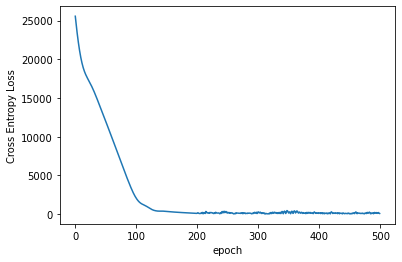

In [58]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [69]:
with torch.no_grad():
    y_val = model.forward(X_test)
    loss = criterion(y_val, y_test)
print(f'{loss:.8f}')

139.84693909


In [64]:
from sklearn.metrics import accuracy_score, classification_report

In [86]:
accuracy_score(y_test.numpy(), np.array([y.argmax().item() for y in y_val]))

0.5023162134944612